# Exploratory Data Analysis

### This dataset *movies_full.csv* is downloaded to GitHub: https://github.com/nastazya/Movies-analytics/tree/master/data

In [1]:
# import the library
%matplotlib inline

import ast
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns

# apply style to all the charts
sns.set_style('whitegrid')

# convert scientific notation to decimals
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.max_columns', 24)

In [2]:
df = pd.read_csv('data/movies_full.csv')
df['release_date'] = pd.to_datetime(df['release_date'])
print(df.dtypes)

id                               int64
title                           object
budget                           int64
revenue                        float64
release_date            datetime64[ns]
popularity                     float64
vote_average                   float64
genres                          object
production_companies            object
cast                            object
keywords                        object
dtype: object


In [3]:
#Setting cast, production_companies, genres and keywords types to a list of dictionaries

df['genres'] = df['genres'].astype(str)
df['production_companies'] = df['production_companies'].astype(str)
df['cast'] = df['cast'].astype(str)
df['keywords'] = df['keywords'].astype(str)

df['genres'] = df['genres'].apply(lambda x: ast.literal_eval(x))
df['production_companies'] = df['production_companies'].apply(lambda x: ast.literal_eval(x))
df['cast'] = df['cast'].apply(lambda x: ast.literal_eval(x))
df['keywords'] = df['keywords'].apply(lambda x: ast.literal_eval(x))

#checking results
cell = df['genres'][100]
print('\nGenres cell: ', type(cell), '. \nCell[0]: ', cell[0], ': ', type(cell[0]))

cell = df['production_companies'][100]
print('\nProduction_companies cell: ', type(cell), '. \nCell[0]: ', cell[0], ': ', type(cell[0]))

cell = df['cast'][100]
print('\nCast cell: ', type(cell), '. \nCell[0]: ', cell[0], ': ', type(cell[0]))

cell = df['keywords'][100]
print('\nKeywords cell: ', type(cell), '. \nCell[0]: ', cell[0], ': ', type(cell[0]))


Genres cell:  <class 'list'> . 
Cell[0]:  {'id': 27, 'name': 'Horror'} :  <class 'dict'>

Production_companies cell:  <class 'list'> . 
Cell[0]:  {'name': 'William Castle Productions', 'id': 10324} :  <class 'dict'>

Cast cell:  <class 'list'> . 
Cell[0]:  {'cast_id': 5, 'character': 'Dr. Rodney Barrett', 'credit_id': '52fe45dcc3a368484e073031', 'gender': 2, 'id': 46099, 'name': 'William Prince', 'order': 0, 'profile_path': '/w5aLRVfH98WHH5wezzMT9oAB8t0.jpg'} :  <class 'dict'>

Keywords cell:  <class 'list'> . 
Cell[0]:  {'id': 428, 'name': 'nurse'} :  <class 'dict'>


In [4]:
df.head(10)

,id,title,budget,revenue,release_date,popularity,vote_average,genres,production_companies,cast,keywords
0,36523,Felix The Cat: The Movie,9000000,1964253.00,1988-10-01,0.03,3.70,"[{'id': 16, 'name': 'Animation'}, {'id': 10751...","[{'name': 'Pannónia Filmstúdió', 'id': 48669},...","[{'cast_id': 1, 'character': 'Felix the Cat (V...","[{'id': 9820, 'name': 'alternate dimension'}, ..."
1,68351,Sankofa,1000000,2691899.00,1993-05-28,0.05,6.90,"[{'id': 18, 'name': 'Drama'}]","[{'name': 'Channel Four Films', 'id': 181}, {'...","[{'cast_id': 6, 'character': 'Sankofa', 'credi...","[{'id': 409, 'name': 'africa'}, {'id': 2831, '..."
2,285908,The Last Breath,3800000,559298.00,1999-03-25,0.07,4.00,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...","[{'name': 'Lions Gate Films', 'id': 35}]","[{'cast_id': 0, 'character': 'Lauren Vaillanco...","[{'id': 10714, 'name': 'serial killer'}]"
3,121173,Voracious,11178,34659.00,2012-09-05,0.08,8.00,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...","[{'name': 'APT Entertainment', 'id': 8355}, {'...","[{'cast_id': 16, 'character': 'Rene', 'credit_...","[{'id': 4694, 'name': 'staged death'}, {'id': ..."
4,110669,Wabash Avenue,2115000,2039000.00,1950-03-31,0.11,7.00,"[{'id': 10402, 'name': 'Music'}]",[{'name': 'Twentieth Century Fox Film Corporat...,"[{'cast_id': 1004, 'character': 'Ruby Summers'...","[{'id': 4344, 'name': 'musical'}, {'id': 4497,..."
5,110428,Camille Claudel 1915,3512454,115860.00,2013-03-13,0.11,7.00,"[{'id': 18, 'name': 'Drama'}]","[{'name': 'Canal+', 'id': 5358}, {'name': 'Art...","[{'cast_id': 3, 'character': 'Camille Claudel'...","[{'id': 254, 'name': 'france'}, {'id': 745, 'n..."
6,110428,Camille Claudel 1915,3512454,115860.00,2013-03-13,0.11,7.00,"[{'id': 18, 'name': 'Drama'}]","[{'name': 'Canal+', 'id': 5358}, {'name': 'Art...","[{'cast_id': 3, 'character': 'Camille Claudel'...","[{'id': 254, 'name': 'france'}, {'id': 745, 'n..."
7,110428,Camille Claudel 1915,3512454,115860.00,2013-03-13,0.11,7.00,"[{'id': 18, 'name': 'Drama'}]","[{'name': 'Canal+', 'id': 5358}, {'name': 'Art...","[{'cast_id': 3, 'character': 'Camille Claudel'...","[{'id': 254, 'name': 'france'}, {'id': 745, 'n..."
8,110428,Camille Claudel 1915,3512454,115860.00,2013-03-13,0.11,7.00,"[{'id': 18, 'name': 'Drama'}]","[{'name': 'Canal+', 'id': 5358}, {'name': 'Art...","[{'cast_id': 3, 'character': 'Camille Claudel'...","[{'id': 254, 'name': 'france'}, {'id': 745, 'n..."
9,53863,Star of Midnight,280,831.00,1935-04-19,0.11,5.30,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...","[{'name': 'RKO Radio Pictures', 'id': 6}]","[{'cast_id': 4, 'character': 'Clay 'Dal' Dalze...","[{'id': 733, 'name': 'dancer'}, {'id': 163110,..."


## Data Perspective
- One variable
    - Numeric variables
        - continuous: budget, revenue
        - discrete: votes, popularity
    - Categorical variables
        - ordinal: 
        - nominal: genre, production_companies, actors, keywords
- Multiple variables
    - Numeric x Numeric
        - budget VS revenue
        - correlation heatmap
    - Categorical x Numeric
        - title raitings VS rating
        -  production_companies VS revenue
    - Categorical x Categorical
        - actors VS genre
        - production_companies VS genre

## One Variable (numeric)

count        4627.00
mean     27022811.00
std      28984352.00
min           113.00
25%       6000000.00
50%      17000000.00
75%      37000000.00
max     150000000.00
Name: budget, dtype: float64


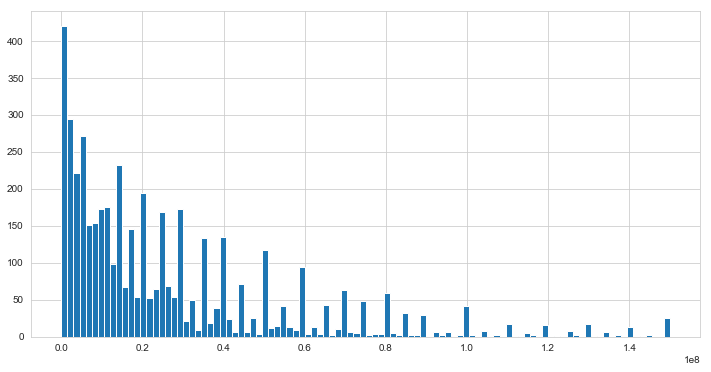

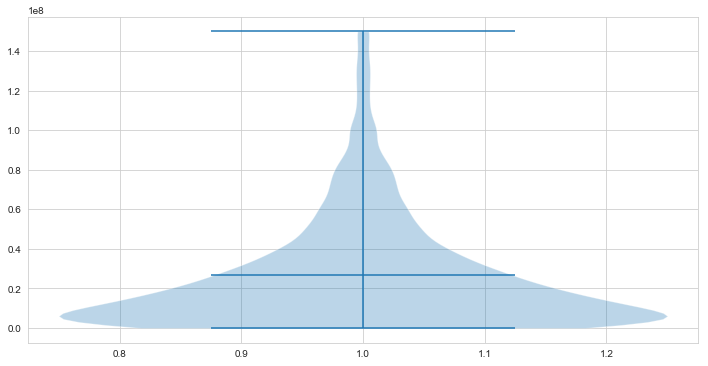

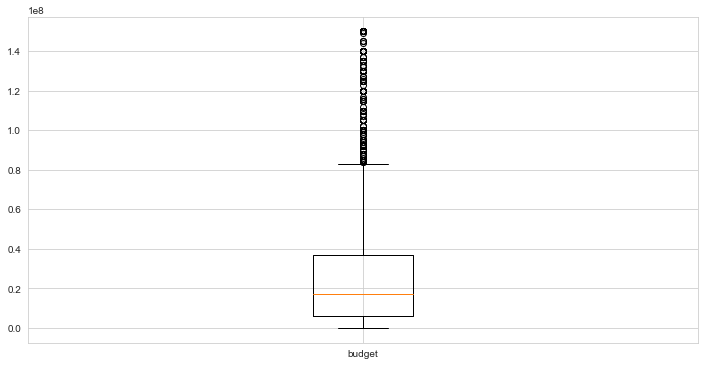

In [5]:
# Analize pricing distribution

# Histogram
print(df['budget'].describe().round())
plt.figure(figsize=(12,6))
plt.hist(df['budget'], bins=100)
plt.show()
# Violin and box plot
plt.figure(figsize=(12,6))
plt.violinplot(df['budget'], showmeans=True)
plt.show()
plt.figure(figsize=(12,6))
plt.boxplot(df['budget'])
plt.xticks([1], ['budget'], rotation='horizontal')
plt.show()

count   4627.00
mean       6.28
std        0.86
min        2.00
25%        5.70
50%        6.30
75%        6.90
max        8.70
Name: vote_average, dtype: float64


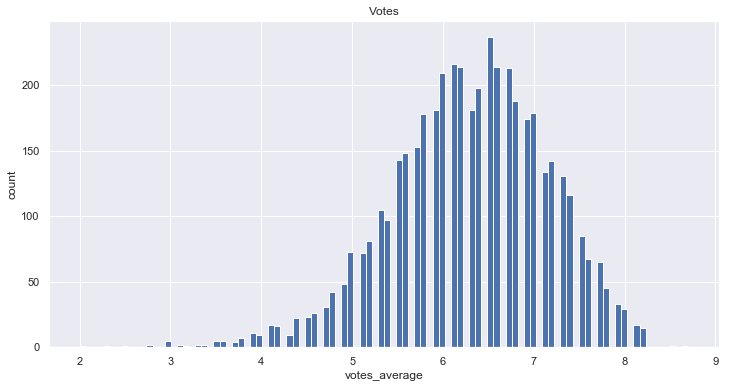

In [27]:
#Analyze votes
print(df['vote_average'].describe())
plt.figure(figsize=(12,6))
plt.hist(df['vote_average'], bins=100)
plt.title('Votes')
plt.xlabel('votes_average')
plt.ylabel('count')
plt.show()

count   4627.00
mean       8.74
std        4.26
min        0.03
25%        5.94
50%        8.46
75%       11.43
max       22.49
Name: popularity, dtype: float64


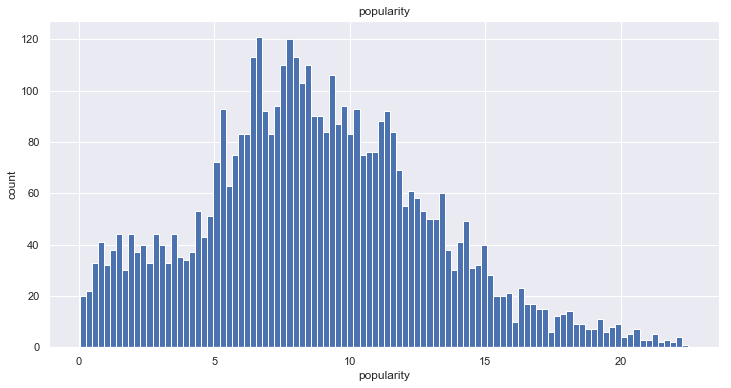

In [31]:
#Analyze popularity
print(df['popularity'].describe())
plt.figure(figsize=(12,6))
plt.hist(df['popularity'], bins=100)
plt.title('popularity')
plt.xlabel('popularity')
plt.ylabel('count')
plt.show()

## One Variable (categorical)

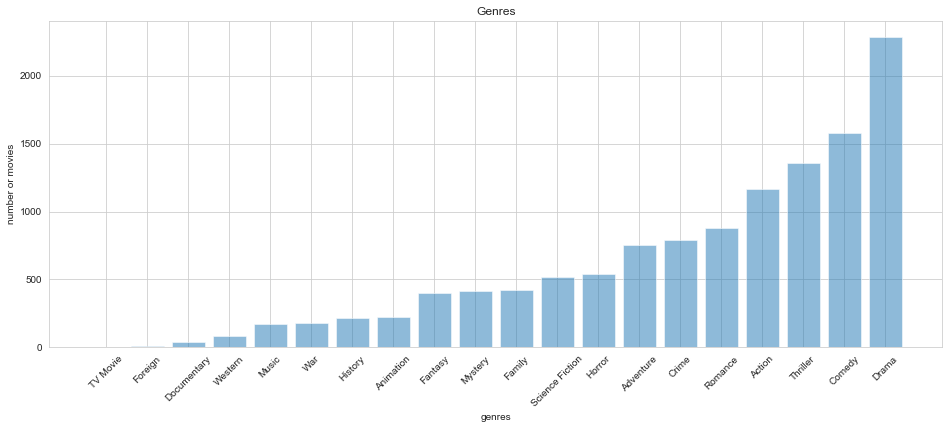

In [8]:
# Analize genres
l=[]
for i, item in enumerate(df['genres']):
    for cell in item:
        l.append(cell['name'])
genres_all = np.array(l) 
g_name, g_count = np.unique(genres_all, return_counts=True)
genres = zip(g_name, g_count) # list of Unique Values along with occurrence Count
genres = list(genres)
genres = sorted(genres, key = lambda x: x[1]) 
for i, elem in enumerate(genres):
    g_name[i] = elem[0]
    g_count[i] = elem[1]

# Bar Chart
plt.figure(figsize=(16,6))
plt.title('Genres')
plt.xlabel('genres')
plt.ylabel('number or movies')
y_pos = range(len(g_name))
plt.bar(y_pos,g_count, align='center', alpha=0.5)
plt.xticks(y_pos, g_name, rotation=45)
plt.show()

In [9]:
#TODO: Analyze all the categorical variables

## Multiple variables (Numeric x Numeric)

In [10]:
# Correlation
df.corr()

,id,budget,revenue,popularity,vote_average
id,1.00,-0.07,-0.06,0.02,-0.01
budget,-0.07,1.00,0.63,0.36,-0.14
revenue,-0.06,0.63,1.00,0.44,0.09
popularity,0.02,0.36,0.44,1.00,0.23
vote_average,-0.01,-0.14,0.09,0.23,1.00


In [11]:
# heatmap


In [12]:
# Visualization : correlation between Price x SQFT


In [13]:
# TODO: Create a scatterplot Price x Mean Income
# TODO: What is the correlation between Price x Mean Income


In [14]:
# Box plot to show the distribution between bedrooms x price


## Multiple variables (Categorical x Numeric)

## Multiple variables (Categorical x Categorical)

In [15]:
#

## Business Perspective
"An approximate answer to the right question is worth a great deal more than a precise answer to the wrong question." John Tukey

<Figure size 864x432 with 0 Axes>

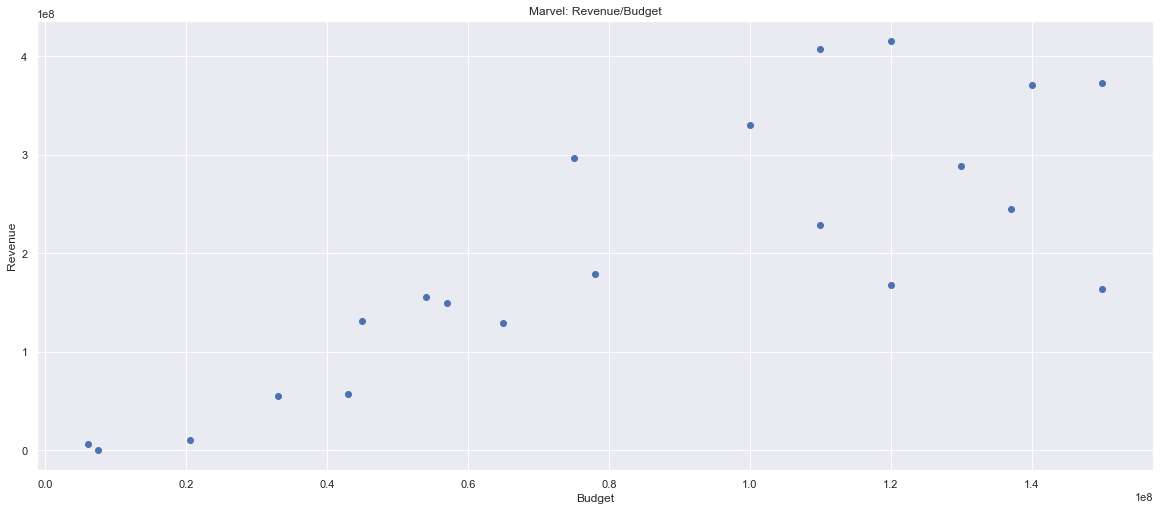

In [30]:
# Show the budget/revenue curve for Marvel Productions
index_marvel=[]
for i, item in enumerate(df['production_companies']):
    for cell in item:                                   #cell is a dictionary object
        if 'Marvel' in cell['name']:
            index_marvel.append(i)
            break
df_marvel = df.loc[index_marvel, :]
df_marvel.sort_values(by='budget')
df_marvel.reset_index(drop=True, inplace=True)

#mylambda = lambda mylist, x: [mylist.index(item) if x in item] for item in mylist
#df_test = df.iloc[mylambda(df['title'],'Sun')]
#df_test

#mylambda = lambda mylist, x: mylist.index(x) if x in [cell['name'] for cell in item] for i, item in mylist  else False
#df_marvel = df.iloc[mylambda(df['production_companies'],'Marvel')]
#df_marvel

from matplotlib.pyplot import subplots, show
plt.figure(figsize=(12,6))
fig, ax = subplots()
ax.plot(df_marvel['budget'], df_marvel['revenue'], 'o')
ax.set_xlabel("Budget")
ax.set_ylabel("Revenue")
ax.set_title("Marvel: Revenue/Budget");
show()

In [17]:
# What is the total sales ($) per month?





(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

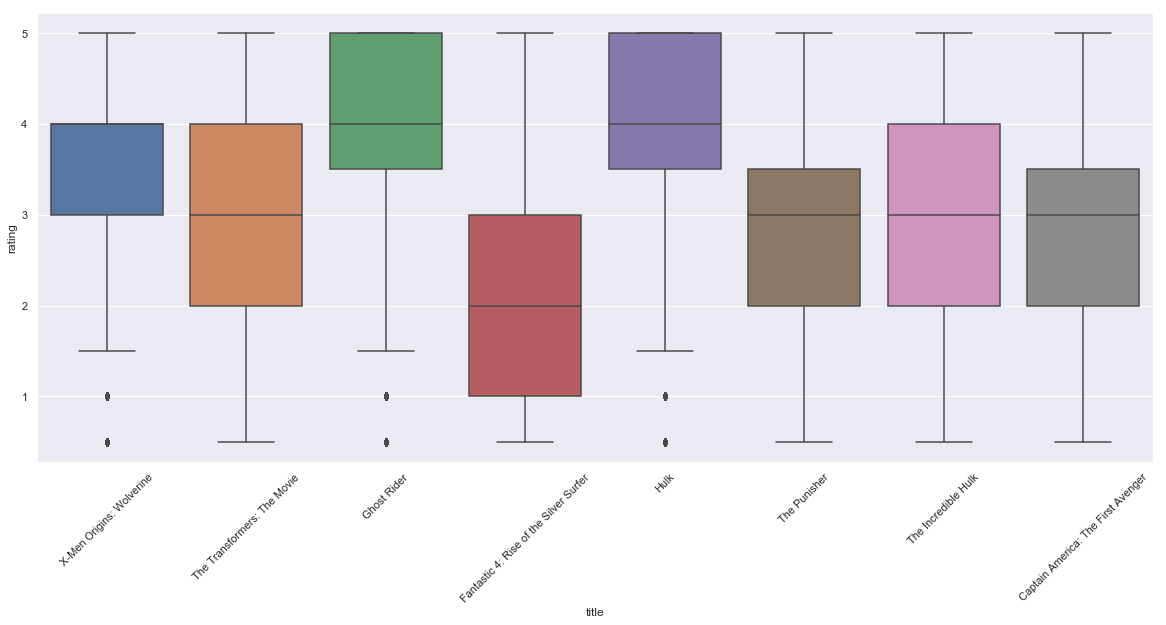

In [18]:
# Show the raitings for each Marvel movie
marvel = df_marvel[['id','title']]
ratings = pd.read_csv('data/ratings.csv')
ratings.rename(columns={'movieId':'id'}, inplace=True)
del_index = ratings[ratings['rating'] == 0].index
ratings.drop(del_index, inplace=True)
ratings.reset_index(drop=True, inplace=True)

marvel = marvel.merge(ratings, on='id', how='inner')

sns.set(rc={'figure.figsize':(20,8.27)})
sns.boxplot(x=marvel['title'], y=marvel['rating'])
plt.xticks(rotation=45)